## DATA 620: Assignment - High Frequency Words

### Authors: Brian Weinfield, Alex Low, Jagruti Solao, Niteen Kumar

#### Date: 7/2/18

In [132]:
import nltk

In [133]:
#1. Choose a corpus of interest.
from nltk.corpus import inaugural

In [134]:
import pandas as pd

In [135]:
import numpy as np

In [136]:
len(nltk.corpus.inaugural.words())

145735

In [137]:
#2. How many total unique words are in the corpus?
len(set(w.lower() for w in nltk.corpus.inaugural.words() if w.isalpha()))

8968

In [138]:
words = [w.lower() for w in nltk.corpus.inaugural.words() if w.isalpha()]

In [139]:
fd = nltk.FreqDist(words)

In [140]:
print(fd)

<FreqDist with 8968 samples and 132124 outcomes>


In [141]:
fd_df=pd.DataFrame(fd.most_common(500))

In [142]:
fd_df.head()

,0,1
0,the,9906
1,of,6986
2,and,5139
3,to,4432
4,in,2749


In [143]:
fd_df.columns=['word','frequency']

In [144]:
fd_df['cumulative frequency']=np.cumsum(fd_df['frequency'])

In [145]:
#3. Taking the most common words, how many unique words represent half of the total words in the corpus?
(fd_df['cumulative frequency'] >= (132124/2)).idxmax()

56

In [146]:
fd_df[55:58]

,word,frequency,cumulative frequency
55,nation,302,65929
56,if,286,66215
57,every,285,66500


In [147]:
#4. Identify the 200 highest frequency words in this corpus.
fd.most_common(200)

[('the', 9906),
 ('of', 6986),
 ('and', 5139),
 ('to', 4432),
 ('in', 2749),
 ('a', 2193),
 ('our', 2058),
 ('that', 1726),
 ('we', 1625),
 ('be', 1460),
 ('is', 1416),
 ('it', 1367),
 ('for', 1154),
 ('by', 1066),
 ('which', 1002),
 ('have', 997),
 ('with', 937),
 ('as', 931),
 ('not', 924),
 ('will', 851),
 ('i', 832),
 ('this', 812),
 ('all', 794),
 ('are', 779),
 ('their', 738),
 ('but', 628),
 ('has', 612),
 ('government', 593),
 ('its', 565),
 ('people', 563),
 ('from', 551),
 ('or', 542),
 ('on', 520),
 ('my', 491),
 ('been', 482),
 ('can', 465),
 ('us', 455),
 ('no', 453),
 ('they', 440),
 ('so', 383),
 ('an', 380),
 ('upon', 369),
 ('who', 361),
 ('must', 346),
 ('at', 341),
 ('may', 334),
 ('great', 331),
 ('states', 329),
 ('world', 329),
 ('them', 327),
 ('should', 323),
 ('those', 317),
 ('shall', 314),
 ('more', 307),
 ('country', 302),
 ('nation', 302),
 ('if', 286),
 ('every', 285),
 ('these', 278),
 ('any', 276),
 ('was', 268),
 ('other', 256),
 ('peace', 252),
 ('ther

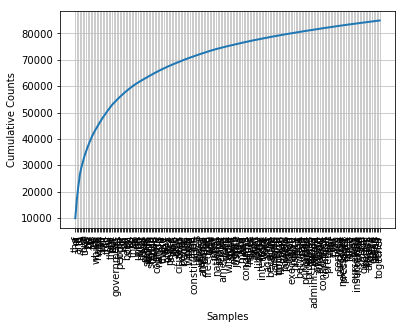

In [148]:
#5. Create a graph that shows the relative frequency of these 200 words.
fd.plot(200,cumulative=True)

In [149]:
#6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
fd_df['proportion of words'] = (fd_df['frequency']/132124)*100

In [150]:
fd_df[0:19]

,word,frequency,cumulative frequency,proportion of words
0,the,9906,9906,7.497502
1,of,6986,16892,5.287457
2,and,5139,22031,3.889528
3,to,4432,26463,3.354425
4,in,2749,29212,2.080621
5,a,2193,31405,1.659804
6,our,2058,33463,1.557628
7,that,1726,35189,1.306349
8,we,1625,36814,1.229905
9,be,1460,38274,1.105023


No, this corpus does not appear to follow Zipf's law. The frequency of each word is not exactly proportional to the rank as we see from the first few words. If Zip's law held, the first word would occur twice as often as the 2nd word, three times as often as the 3rd word etc. In this particular corpus, this does not appear to be true. The potential reason being that this corpus might not be large enough for the law to hold or might be too specific topically.

In [151]:
# 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

The frequency of words in this corpus would likely vary from other corpuses since inaugural addresses often hit upon similar themes that might not be representative of all language. For example, there might be more references to nouns such as America, God, nation, people and more superlative adjectives such as great, good, inspiring, august etc.